In [1]:
# Import libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.callbacks import EarlyStopping
from keras.optimizers.legacy import Adam
# ImageGenerator is commonly used for preprocessing and augmenting images before feeding them into a neural network for training or testing.
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Initialize image data generator with rescaling, making training and testing more efficent.
train_data_gen = ImageDataGenerator(
    rescale=1./255) 
test_data_gen = ImageDataGenerator(
    rescale=1./255) # This argument scales the pixel values of the images. 
# Pixel values are usually integers ranging from 0 to 255, representing the intensity of the pixel (0 for black, 255 for white). 
# By dividing each pixel value by 255, all pixel values are transformed to the range between 0 and 1. 
# This rescaling is a form of normalization, which helps the neural network converge faster during training. 
# Normalization ensures that the model's learning is more stable and can speed up training by reducing the scale of input features.

In [13]:
# Preprocess all train images using an ImageDataGenerator
# The train_set variable will hold the preprocessed images and labels for training the neural network.
train_set = train_data_gen.flow_from_directory(
        'data/train', # Directory containing the training images
        target_size=(48, 48), # Resizes the images to the specified height and width
        batch_size=64, # Number of images in each batch during training
        color_mode="grayscale", # Convert images to grayscale (each image will have a single channel)
        class_mode='categorical', # Type of labels: 'categorical' for one-hot encoded labels
        shuffle=True) # Shuffle the order of images after each epoch during training

Found 28821 images belonging to 7 classes.


In [14]:
# Preprocess all test images
test_set = test_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=False)

Found 7066 images belonging to 7 classes.


In [15]:
# Configuration
input_shape = (48, 48, 1)
output_class = 7

In [16]:
# Model structure
emotion_model = Sequential()

# First convolutional layer
emotion_model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=input_shape))
emotion_model.add(BatchNormalization())
emotion_model.add(Activation('relu'))
# MaxPooling is a downsampling operation commonly used in CNNs
# to reduce the spatial dimensions (width and height) of an input volume,
# effectively reducing the number of parameters and computation in the network
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25)) # Prevent overfitting

# Second convolutional layer
emotion_model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
emotion_model.add(BatchNormalization())
emotion_model.add(Activation('relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

# Third convolutional layer
emotion_model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
emotion_model.add(BatchNormalization())
emotion_model.add(Activation('relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

# Fourth convolutional layer
emotion_model.add(Conv2D(256, kernel_size=(3, 3), padding='same'))
emotion_model.add(BatchNormalization())
emotion_model.add(Activation('relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

# Flatten the output for dense layers
emotion_model.add(Flatten())

# Fully connected layers
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(Dropout(0.5))

emotion_model.add(Dense(512, activation='relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(Dropout(0.5))

# Output layer
emotion_model.add(Dense(output_class, activation='softmax'))

# Compile the model
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [17]:
# Check layers and parameters in the model
emotion_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_18 (Ba  (None, 48, 48, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_6 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 64)       

In [18]:
# Train the neural network/model
emotion_model_info = emotion_model.fit(
        train_set,
        steps_per_epoch=28821 // 64,
        epochs=50,
        validation_data=test_set,
        validation_steps=7066 // 64,
        callbacks=[early_stopping])

Epoch 1/50
450/450 [==============================] - 51s 112ms/step - loss: 2.8527 - accuracy: 0.1738 - val_loss: 1.9429 - val_accuracy: 0.1727
Epoch 2/50
450/450 [==============================] - 56s 125ms/step - loss: 2.4700 - accuracy: 0.2062 - val_loss: 1.8692 - val_accuracy: 0.2527
Epoch 3/50
450/450 [==============================] - 58s 130ms/step - loss: 2.2734 - accuracy: 0.2241 - val_loss: 1.8606 - val_accuracy: 0.2151
Epoch 4/50
450/450 [==============================] - 62s 137ms/step - loss: 2.1343 - accuracy: 0.2431 - val_loss: 1.7578 - val_accuracy: 0.3023
Epoch 5/50
450/450 [==============================] - 62s 137ms/step - loss: 2.0185 - accuracy: 0.2725 - val_loss: 1.7344 - val_accuracy: 0.3111
Epoch 6/50
450/450 [==============================] - 121s 270ms/step - loss: 1.9255 - accuracy: 0.2956 - val_loss: 1.6709 - val_accuracy: 0.3443
Epoch 7/50
450/450 [==============================] - 182s 406ms/step - loss: 1.8560 - accuracy: 0.3097 - val_loss: 1.6413 - val_

In [19]:
# Calculate the loss and any other metrics defined during the model compilation (such as accuracy) for the provided test data (test_set) 
# using the trained emotion_model. The evaluation results will be returned showing how well the model performs on unseen data.
emotion_model.evaluate(x=test_set)

111/111 [==============================] - 3s 31ms/step - loss: 1.0468 - accuracy: 0.6128


[1.0468443632125854, 0.6127936840057373]

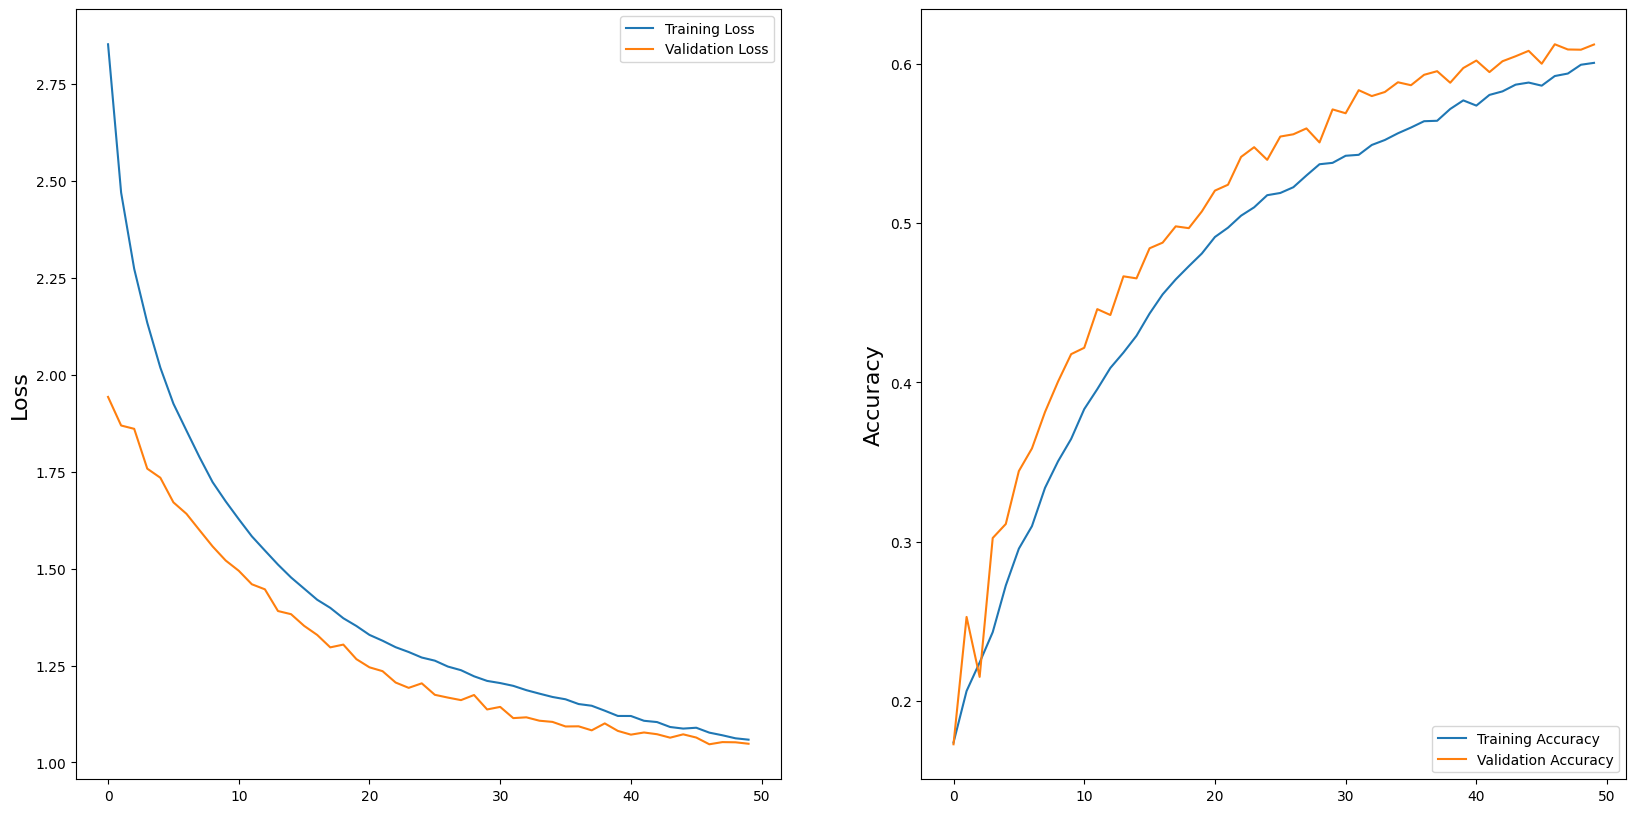

In [20]:
import matplotlib.pyplot as plt

# Plot accuracy score
plt.figure(figsize=(20, 10))

# First subplot: Training and validation loss
plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize=16)
plt.plot(emotion_model_info.history['loss'], label='Training Loss')
plt.plot(emotion_model_info.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

# Second subplot: Training and validation accuracy
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(emotion_model_info.history['accuracy'], label='Training Accuracy')
plt.plot(emotion_model_info.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()

In [21]:
# Save trained model in .h5 file
emotion_model.save('models/emotion_model_1.h5')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
